# Investigation of Bessel's correction

We consider the role of [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
Check the documentation [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std) and [numpy.var](https://numpy.org/doc/stable/reference/generated/numpy.var) and you will find the following

$$
\texttt{np.var(x,ddof=0)} = S_N^2 = {\color{#DC2830}{\frac{1}{N}}} \sum_{i=1}^N (x_i - \bar{x})^2
$$

$$
\texttt{np.var(x,ddof=1)} = S^2 = {\color{#0271AE}{\frac{1}{N-1}}} \sum_{i=1}^N (x_i - \bar{x})^2
$$


$$
\texttt{np.std(x,ddof=0)} = \sqrt{S_N^2} = \sqrt{{\color{#DC2830}{\frac{1}{N}}} \sum_{i=1}^N (x_i - \bar{x})^2}
$$


$$
\texttt{np.std(x,ddof=1)} = \sqrt{S^2} = \sqrt{{\color{#0271AE}{\frac{1}{N-1}}} \sum_{i=1}^N (x_i - \bar{x})^2}
$$

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# generate many trials, and for each draw a data set with N entries, and calculate estimators
N_trials = 100000
N = 10

x = np.random.normal(size=N_trials*N_per_trial).reshape(N_trials,-1)

var_0 = x.var(axis=1, ddof=0)
var_1 = x.var(axis=1, ddof=1)

std_0 = x.std(axis=1, ddof=0)
std_1 = x.std(axis=1, ddof=1)

## Compare variance estimators

In [56]:
print("mean of var_0 = {0} +/- {1}, which is {2} sigma from true value".format(
    np.mean(var_0),
    np.std(var_0)/np.sqrt(N_trials),
    (np.mean(var_0)-1.)/(np.std(var_0)/np.sqrt(N_trials))
    ))

mean of var_0 = 0.9004618194480143 +/- 0.001340946493285875, which is -74.22979294876703 sigma from true value


In [57]:
print("mean of var_1 = {0} +/- {1}, which is {2} sigma from true value".format(
    np.mean(var_1),
    np.std(var_1)/np.sqrt(N_trials),
    (np.mean(var_1)-1.)/(np.std(var_1)/np.sqrt(N_trials))
    ))

mean of var_1 = 1.0005131327200156 +/- 0.0014899405480954166, which is 0.34439811754339117 sigma from true value


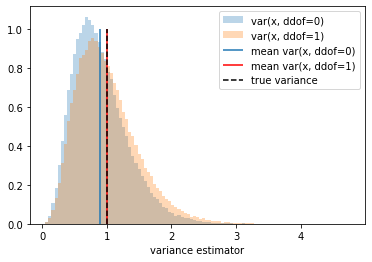

In [64]:
bins = np.linspace(var_1.min(),var_1.max(),100)
_ = plt.hist(var_0, bins=bins, density=True, alpha=.3, label='var(x, ddof=0)')
_ = plt.hist(var_1, bins=bins, density=True, alpha=.3, label='var(x, ddof=1)')
plt.xlabel('variance estimator')
plt.vlines(np.mean(var_0),0,1, label='mean var(x, ddof=0)')
plt.vlines(np.mean(var_1),0,1, color='r', label='mean var(x, ddof=1)')
plt.vlines(1,0,1, color='black', ls='dashed',label='true variance')
plt.legend();

## Standard Deviation Estimators

In [60]:
print("mean of std_0 = {0} +/- {1}, which is {2} sigma from true value".format(
    np.mean(std_0),
    np.std(std_0)/np.sqrt(N_trials),
    (np.mean(std_0)-1.)/(np.std(std_0)/np.sqrt(N_trials))
    ))

mean of std_0 = 0.9230369910725107 +/- 0.0006961647259077399, which is -110.5528706975724 sigma from true value


In [61]:
print("mean of std_1 = {0} +/- {1}, which is {2} sigma from true value".format(
    np.mean(std_1),
    np.std(std_1)/np.sqrt(N_trials),
    (np.mean(std_1)-1.)/(np.std(std_1)/np.sqrt(N_trials))
    ))

mean of std_1 = 0.9729664187925469 +/- 0.000733822053511763, which is -36.83942323357797 sigma from true value


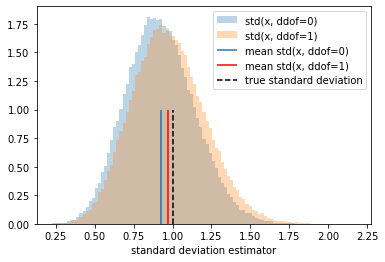

In [63]:
bins = np.linspace(std_1.min(),std_1.max(),100)
_ = plt.hist(std_0, bins=bins, density=True, alpha=.3, label='std(x, ddof=0)')
_ = plt.hist(std_1, bins=bins, density=True, alpha=.3, label='std(x, ddof=1)')
plt.vlines(np.mean(std_0),0,1, label='mean std(x, ddof=0)')
plt.vlines(np.mean(std_1),0,1, color='r', label='mean std(x, ddof=1)')
plt.vlines(1,0,1, color='black', ls='dashed',label='true standard deviation')
plt.xlabel('standard deviation estimator')
plt.legend();

**Warning** The bias estimator is not equivariant to transformation of the estimator/estimand. This follows from the transformation properties of the the distribution when changing random variables, the Jacobian factor influences the mean.  

**Corrolary** What is the motivation for $\texttt{np.std(x,ddof=1)} = \sqrt{S^2} = \sqrt{{\color{#0271AE}{\frac{1}{N-1}}} \sum_{i=1}^N (x_i - \bar{x})^2}$?


